# Assignment-11-walmart Product Reviews

1) Extract reviews of any product from ecommerce website like amazon,
2) Perform emotion mining

In [7]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [8]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('https://raw.githubusercontent.com/omgo101/dataset-/main/Book1.csv',encoding = 'unicode_escape')
reviews

,reviews.text
0,I thought it would be as big as small paper bu...
1,This kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...
3,I am 100 happy with my purchase. I caught it o...
4,Solid entry level Kindle. Great for kids. Gift...
...,...
994,this is my third Alexa and combined with my fi...
995,What an amazing piece of technology. I was imp...
996,I bought it for my family and everyone loves i...
997,"I gave as a gift to my kids for Christmas, the..."


In [9]:
reviews=reviews.rename({'reviews.text':'comment'},axis=1)


## Text Preprocessing

In [10]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead.',
 'This kindle is light and easy to use especially at the beach!!!',
 "Didnt know how much i'd use a kindle so went for the lower end. im happy with it, even if its a little dark",
 "I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit. A simple book light from the Dollar tree solves that issue. This is my seco

In [11]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'I thought it would be as big as small paper but turn out to be just like my palm. I think it is too small to read on it... not very comfortable as regular Kindle. Would definitely recommend a paperwhite instead. This kindle is light and easy to use especially at the beach!!! Didnt know how much i\'d use a kindle so went for the lower end. im happy with it, even if its a little dark I am 100 happy with my purchase. I caught it on sale at a really good price. I am normally a real book person, but I have a 1 year old who loves ripping up pages. The Kindle prevents that, it\'s extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books. I finish one and start another, without having to go store. It serves all my needs. I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn\'t backlit. A simple book light from the Dollar tree solves that issue. This is my second Kindle 

In [12]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I thought it would be as big as small paper but turn out to be just like my palm I think it is too small to read on it not very comfortable as regular Kindle Would definitely recommend a paperwhite instead This kindle is light and easy to use especially at the beach Didnt know how much id use a kindle so went for the lower end im happy with it even if its a little dark I am 100 happy with my purchase I caught it on sale at a really good price I am normally a real book person but I have a 1 year old who loves ripping up pages The Kindle prevents that its extremely portable it fits better in my purse than a giant book and I have it loaded with lots of books I finish one and start another without having to go store It serves all my needs I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasnt backlit A simple book light from the Dollar tree solves that issue This is my second Kindle the first being the old Keyboar

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'thought', 'it', 'would', 'be', 'as', 'big', 'as', 'small', 'paper', 'but', 'turn', 'out', 'to', 'be', 'just', 'like', 'my', 'palm', 'I', 'think', 'it', 'is', 'too', 'small', 'to', 'read', 'on', 'it', 'not', 'very', 'comfortable', 'as', 'regular', 'Kindle', 'Would', 'definitely', 'recommend', 'a', 'paperwhite', 'instead', 'This', 'kindle', 'is', 'light', 'and', 'easy', 'to', 'use', 'especially']


In [15]:
len(text_tokens)

33740

In [16]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['thought', 'would', 'big', 'small', 'paper', 'turn', 'like', 'palm', 'think', 'small', 'read', 'comfortable', 'regular', 'Kindle', 'Would', 'definitely', 'recommend', 'paperwhite', 'instead', 'This', 'kindle', 'light', 'easy', 'use', 'especially', 'beach', 'Didnt', 'know', 'much', 'id', 'use', 'kindle', 'went', 'lower', 'end', 'im', 'happy', 'even', 'little', 'dark', '100', 'happy', 'purchase', 'caught', 'sale', 'really', 'good', 'price', 'normally', 'real', 'book', 'person', '1', 'year', 'old', 'loves', 'ripping', 'pages', 'Kindle', 'prevents', 'extremely', 'portable', 'fits', 'better', 'purse', 'giant', 'book', 'loaded', 'lots', 'books', 'finish', 'one', 'start', 'another', 'without', 'go', 'store', 'serves', 'needs', 'picked', 'one', 'Paperwhite', 'price', 'unbeatable', 'difference', 'could', 'see', 'one', 'wasnt', 'backlit', 'simple', 'book', 'light', 'Dollar', 'tree', 'solves', 'issue', 'This', 'second', 'Kindle', 'first', 'old', 'Keyboard', 'model', 'put', 'fell', 'love', 'keybo

In [17]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['thought', 'would', 'big', 'small', 'paper', 'turn', 'like', 'palm', 'think', 'small', 'read', 'comfortable', 'regular', 'kindle', 'would', 'definitely', 'recommend', 'paperwhite', 'instead', 'this', 'kindle', 'light', 'easy', 'use', 'especially', 'beach', 'didnt', 'know', 'much', 'id', 'use', 'kindle', 'went', 'lower', 'end', 'im', 'happy', 'even', 'little', 'dark', '100', 'happy', 'purchase', 'caught', 'sale', 'really', 'good', 'price', 'normally', 'real', 'book', 'person', '1', 'year', 'old', 'loves', 'ripping', 'pages', 'kindle', 'prevents', 'extremely', 'portable', 'fits', 'better', 'purse', 'giant', 'book', 'loaded', 'lots', 'books', 'finish', 'one', 'start', 'another', 'without', 'go', 'store', 'serves', 'needs', 'picked', 'one', 'paperwhite', 'price', 'unbeatable', 'difference', 'could', 'see', 'one', 'wasnt', 'backlit', 'simple', 'book', 'light', 'dollar', 'tree', 'solves', 'issue', 'this', 'second', 'kindle', 'first', 'old', 'keyboard', 'model', 'put', 'fell', 'love', 'keybo

In [18]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['thought', 'would', 'big', 'small', 'paper', 'turn', 'like', 'palm', 'think', 'small', 'read', 'comfort', 'regular', 'kindl', 'would', 'definit', 'recommend', 'paperwhit', 'instead', 'thi', 'kindl', 'light', 'easi', 'use', 'especi', 'beach', 'didnt', 'know', 'much', 'id', 'use', 'kindl', 'went', 'lower', 'end', 'im', 'happi', 'even', 'littl', 'dark', '100', 'happi', 'purchas', 'caught', 'sale', 'realli', 'good', 'price', 'normal', 'real', 'book', 'person', '1', 'year', 'old', 'love', 'rip', 'page', 'kindl', 'prevent', 'extrem', 'portabl', 'fit', 'better', 'purs', 'giant', 'book', 'load', 'lot', 'book', 'finish', 'one', 'start', 'anoth', 'without', 'go', 'store', 'serv', 'need', 'pick', 'one', 'paperwhit', 'price', 'unbeat', 'differ', 'could', 'see', 'one', 'wasnt', 'backlit', 'simpl', 'book', 'light', 'dollar', 'tree', 'solv', 'issu', 'thi', 'second', 'kindl', 'first', 'old', 'keyboard', 'model', 'put', 'fell', 'love', 'keyboard', 'lol', 'like', 'wont', 'last', 'solid', 'entri', 'leve

In [19]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

thought would big small paper turn like palm think small read comfortable regular kindle would definitely recommend paperwhite instead this kindle light easy use especially beach didnt know much id use kindle went lower end im happy even little dark 100 happy purchase caught sale really good price normally real book person 1 year old loves ripping pages kindle prevents extremely portable fits better purse giant book loaded lots books finish one start another without go store serves needs picked one paperwhite price unbeatable difference could see one wasnt backlit simple book light dollar tree solves issue this second kindle first old keyboard model put fell love keyboard lol likely wont last solid entry level kindle great kids gifted kid friend love use read ipads battery good higher model bit better this make excellent ebook reader dont expect much device except read basic ebooks good thing cheap good read sun ordered daughter black paperwhite love read quite bit larger books driving

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['think', 'would', 'big', 'small', 'paper', 'turn', 'like', 'palm', 'think', 'small', 'read', 'comfortable', 'regular', 'kindle', 'would', 'definitely', 'recommend', 'paperwhite', 'instead', 'this', 'kindle', 'light', 'easy', 'use', 'especially', 'beach', 'do', 'not', 'know', 'much', 'i', 'd', 'use', 'kindle', 'go', 'low', 'end', 'I', 'm', 'happy', 'even', 'little', 'dark', '100', 'happy', 'purchase', 'catch', 'sale', 'really', 'good', 'price', 'normally', 'real', 'book', 'person', '1', 'year', 'old', 'love', 'rip', 'page', 'kindle', 'prevent', 'extremely', 'portable', 'fit', 'well', 'purse', 'giant', 'book', 'load', 'lot', 'book', 'finish', 'one', 'start', 'another', 'without', 'go', 'store', 'serve', 'need', 'pick', 'one', 'paperwhite', 'price', 'unbeatable', 'difference', 'could', 'see', 'one', 'be', 'not', 'backlit', 'simple', 'book', 'light', 'dollar', 'tree', 'solve', 'issue', 'this', 'second', 'kindle', 'first', 'old', 'keyboard', 'model', 'put', 'fall', 'love', 'keyboard', 'lol

In [21]:
clean_reviews=' '.join(lemmas)
clean_reviews

'think would big small paper turn like palm think small read comfortable regular kindle would definitely recommend paperwhite instead this kindle light easy use especially beach do not know much i d use kindle go low end I m happy even little dark 100 happy purchase catch sale really good price normally real book person 1 year old love rip page kindle prevent extremely portable fit well purse giant book load lot book finish one start another without go store serve need pick one paperwhite price unbeatable difference could see one be not backlit simple book light dollar tree solve issue this second kindle first old keyboard model put fall love keyboard lol likely will not last solid entry level kindle great kids gifted kid friend love use read ipad battery good high model bit well this make excellent ebook reader do not expect much device except read basic ebook good thing cheap good read sun order daughter black paperwhite love read quite bit large book drive crazy hold lay want take b

## Feature Extaction

### 1. Using CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'think': 1939, 'would': 2170, 'big': 268, 'small': 1759, 'paper': 1386, 'turn': 2007, 'like': 1134, 'palm': 1382, 'read': 1548, 'comfortable': 412, 'regular': 1584, 'kindle': 1085, 'definitely': 528, 'recommend': 1575, 'paperwhite': 1388, 'instead': 1024, 'this': 1942, 'light': 1128, 'easy': 636, 'use': 2051, 'especially': 693, 'beach': 245, 'do': 595, 'not': 1309, 'know': 1092, 'much': 1256, 'go': 871, 'low': 1173, 'end': 668, 'happy': 910, 'even': 699, 'little': 1150, 'dark': 506, '100': 1, 'purchase': 1519, 'catch': 356, 'sale': 1654, 'really': 1557, 'good': 873, 'price': 1479, 'normally': 1308, 'real': 1554, 'book': 284, 'person': 1413, 'year': 2181, 'old': 1337, 'love': 1171, 'rip': 1635, 'page': 1379, 'prevent': 1476, 'extremely': 739, 'portable': 1459, 'fit': 792, 'well': 2126, 'purse': 1524, 'giant': 854, 'load': 1154, 'lot': 1167, 'finish': 788, 'one': 1343, 'start': 1819, 'another': 151, 'without': 2156, 'store': 1833, 'serve': 1700, 'need': 1281, 'pick': 1424, 'unbeatable':

In [24]:
print(cv.get_feature_names()[150:300])

['anomaly', 'another', 'answer', 'answering', 'anti', 'anticipate', 'antiglare', 'any', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anywhere', 'aol', 'app', 'appeal', 'appear', 'apple', 'appliance', 'applicable', 'application', 'appointment', 'appreciate', 'apprehensive', 'ar', 'area', 'areagreat', 'aren', 'arlo', 'around', 'arrive', 'arrivesit', 'article', 'as', 'aside', 'ask', 'asleep', 'aspect', 'assist', 'assistance', 'assistancenone', 'assistant', 'associate', 'assume', 'assumed', 'at', 'atlsuit', 'att', 'attach', 'audio', 'audiobook', 'auto', 'automate', 'automatically', 'automation', 'auxiliary', 'available', 'average', 'avid', 'awake', 'award', 'aware', 'away', 'awesome', 'awhile', 'awsum', 'baby', 'back', 'background', 'backlight', 'backlighte', 'backlit', 'backup', 'backyard', 'bad', 'bag', 'baked', 'ball', 'band', 'bar', 'barebone', 'barrier', 'base', 'basic', 'basically', 'basis', 'bass', 'bath', 'bathroom', 'battery', 'bb', 'bday', 'be', 'beach', 'bea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(reviewscv.toarray().shape)

(18255, 2216)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [27]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [28]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['able', 'add', 'addition', 'alexa', 'also', 'amazing', 'amazon', 'ask', 'awesome', 'be', 'book', 'buy', 'call', 'camera', 'can', 'christmas', 'connect', 'could', 'day', 'device', 'do', 'dot', 'easy', 'echo', 'enjoy', 'even', 'family', 'feature', 'fun', 'get', 'gift', 'go', 'good', 'great', 'home', 'house', 'it', 'it äôs', 'item', 'its', 'kindle', 'kitchen', 'light', 'like', 'listen', 'look', 'lot', 'love', 'lyric', 'make', 'much', 'music', 'my', 'need', 'new', 'news', 'nice', 'not', 'one', 'phone', 'picture', 'play', 'product', 'purchase', 'quality', 'question', 'read', 'really', 'recipe', 'recommend', 'room', 'say', 'screen', 'security', 'see', 'set', 'show', 'smart', 'sound', 'speaker', 'still', 'talk', 'thing', 'think', 'this', 'time', 'use', 'very', 'video', 'voice', 'want', 'watch', 'we', 'weather', 'well', 'work', 'would', 'you', 'äôs', 'äôt']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [30]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['20', 'ability', 'able', 'absolutely', 'access', 'account', 'actually', 'add', 'addition', 'adjust', 'advertise', 'after', 'ago', 'ai', 'alarm', 'alexa', 'all', 'allow', 'almost', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'and', 'another', 'answer', 'anyone', 'anything', 'app', 'arlo', 'around', 'as', 'ask', 'assistant', 'at', 'audio', 'automation', 'available', 'away', 'awesome', 'back', 'backlight', 'backlit', 'basic', 'battery', 'be', 'become', 'bed', 'bedroom', 'big', 'birthday', 'bit', 'black', 'bluetooth', 'book', 'briefing', 'bright', 'bring', 'build', 'bulb', 'but', 'buy', 'calendar', 'call', 'cam', 'camera', 'cams', 'can', 'can äôt', 'capability', 'case', 'cell', 'change', 'chat', 'check', 'child', 'choice', 'christmas', 'clear', 'clock', 'close', 'cloud', 'cloudcam', 'code', 'come', 'command', 'communicate', 'compatible', 'connect', 'connection', 'control', 'convenient', 'cook', 'cool', 'could', 'couple', 'cover', 'customer', 'dad', 'daily', 'dar

### Generate Word Cloud

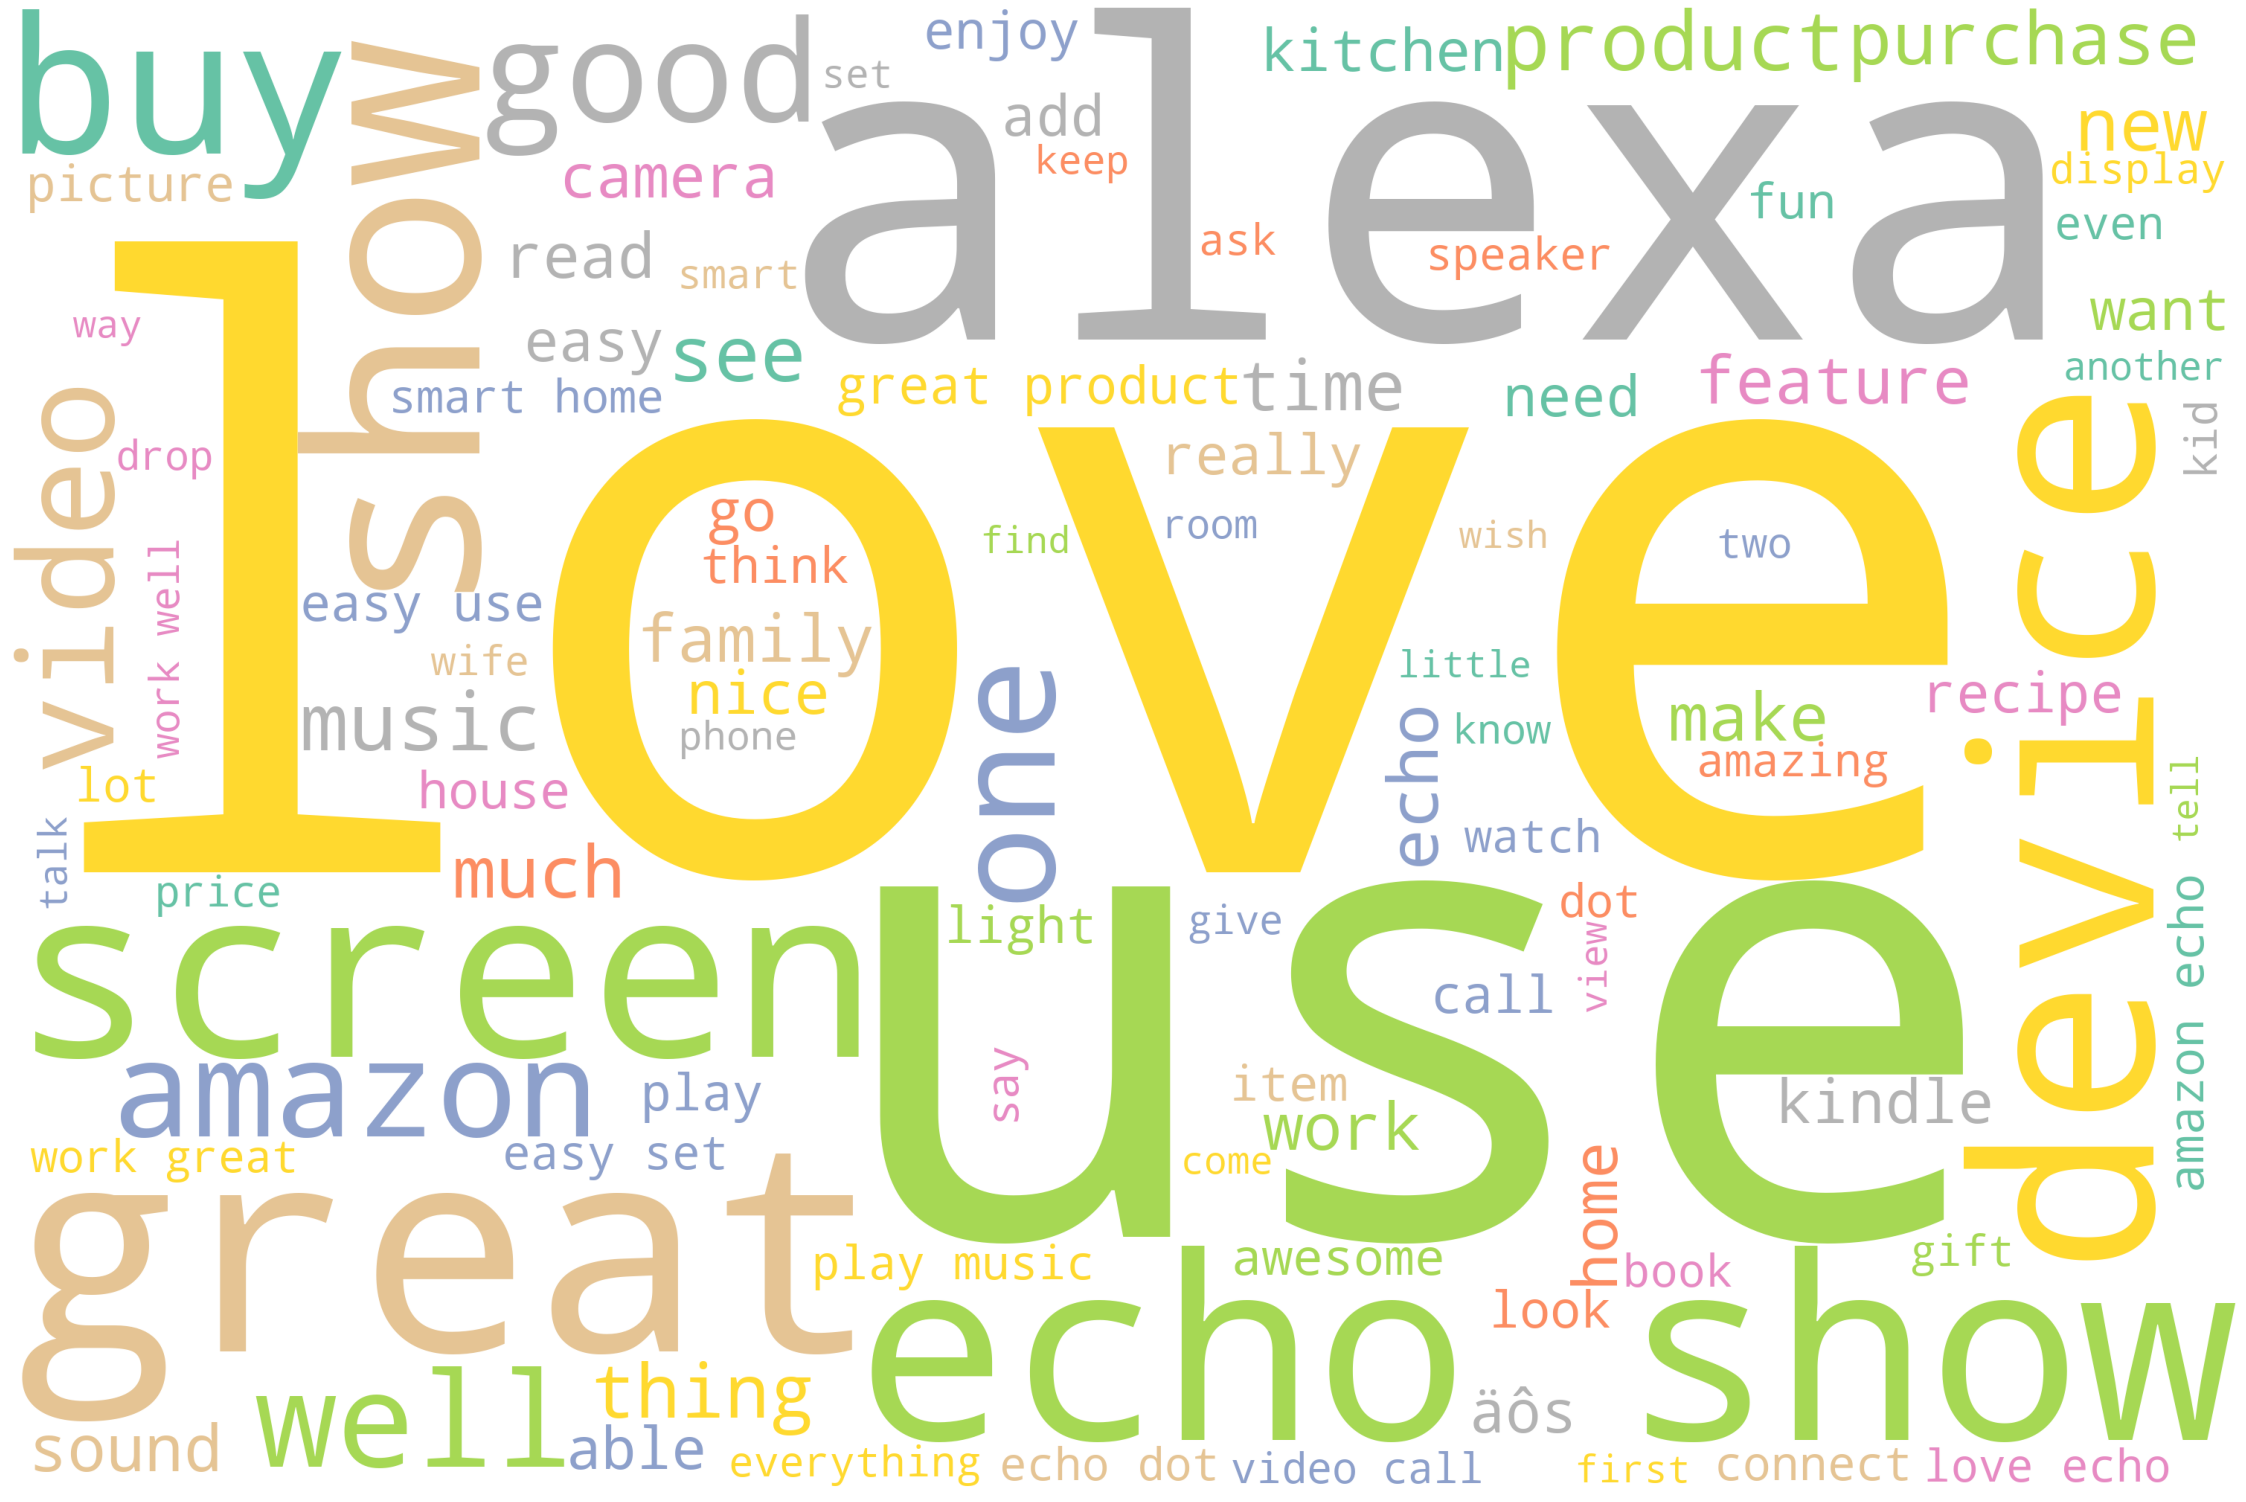

In [31]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [32]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)

issue NOUN
this DET
second ADJ
kindle PROPN
first ADJ
old ADJ
keyboard NOUN
model NOUN
put VERB
fall NOUN
love PROPN
keyboard PROPN
lol PROPN
likely ADV
will AUX
not PART
last VERB
solid ADJ
entry NOUN
level NOUN
kindle NOUN
great ADJ
kids PROPN
gifted PROPN
kid PROPN
friend NOUN
love NOUN
use NOUN
read VERB
ipad NOUN
battery NOUN
good ADJ
high ADJ
model NOUN
bit NOUN
well ADV
this PRON
make VERB
excellent ADJ
ebook NOUN
reader NOUN
do AUX
not PART
expect VERB
much ADJ
device NOUN
except SCONJ
read VERB
basic ADJ
ebook NOUN
good ADJ
thing NOUN
cheap ADJ
good ADJ
read NOUN
sun PROPN
order NOUN
daughter NOUN
black ADJ
paperwhite PROPN
love NOUN
read VERB
quite ADV
bit NOUN
large ADJ
book NOUN
drive NOUN
crazy ADJ
hold NOUN
lay NOUN
want VERB
take VERB
book NOUN
vacation NOUN
lug NOUN
around ADP
thick ADJ
paperback NOUN
throw NOUN
bag NOUN
read VERB
anywhere ADV
its PRON
light ADJ
weight NOUN
easy ADJ
use NOUN
battery NOUN
life NOUN
last ADJ
week NOUN
make VERB
around ADP
awesome ADJ
devi

In [34]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['daughter', 'school', 'offer', 'library', 'ereader', 'book', 'school', 'download', 'county', 'offer', 'read', 'shop', 'ebook', 'device', 'buy', 'month', 'battery', 'charge', 'ebook', 'upgrade', 'model', 'expectation', 'show', 'music', 'score', 'turn', 'want', 'read', 'item', 'look', 'battery', 'time', 'screen', 'eye', 'difficulty', 'read', 'environment', 'buy', 'love', 'make', 'read', 'night', 'feel', 'read', 'book', 'product', 'child', 'read', 'book', 'kindle', 'size', 'letter', 'read', 'use', 'day', 'commute', 'battery', 'life', 'backlight', 'lighting', 'build', 'email', 'pdf', 'file', 'transfer', 'job', 'buy', 'screen', 'time', 'read', 'screen', 'product', 'buy', 'deal', 'item', 'work', 'read', 'day', 'product', 'service', 'refer', 'friend', 'sale', 'man', 'r', 'read', 'pdfs', 'zoom', 'kindle', 'book', 'provide', 'experience', 'battery', 'life', 'look', 'see', 'deal', 'order', 'line', 'pick']


In [35]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,love,320
1,use,318
2,show,271
3,echo,233
4,buy,197
5,video,192
6,music,190
7,screen,175
8,device,164
9,product,163


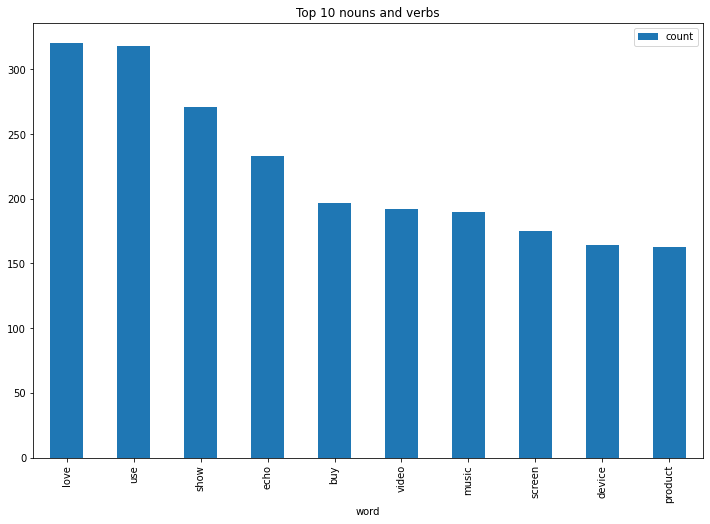

In [36]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [37]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['I thought it would be as big as small paper but turn out to be just like my palm.',
 'I think it is too small to read on it... not very comfortable as regular Kindle.',
 'Would definitely recommend a paperwhite instead.',
 'This kindle is light and easy to use especially at the beach!!!',
 "Didnt know how much i'd use a kindle so went for the lower end.",
 'im happy with it, even if its a little dark I am 100 happy with my purchase.',
 'I caught it on sale at a really good price.',
 'I am normally a real book person, but I have a 1 year old who loves ripping up pages.',
 "The Kindle prevents that, it's extremely portable (it fits better in my purse than a giant book), and I have it loaded with lots of books.",
 'I finish one and start another, without having to go store.',
 'It serves all my needs.',
 "I picked this one over the Paperwhite because the price was unbeatable and the only difference that I could see was this one wasn't backlit.",
 'A simple book light from the Dollar tre

In [38]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I thought it would be as big as small paper bu...
1,I think it is too small to read on it... not v...
2,Would definitely recommend a paperwhite instead.
3,This kindle is light and easy to use especiall...
4,Didnt know how much i'd use a kindle so went f...
...,...
2462,I was impressed with the sound quality I bough...
2463,Definitely recommend buying one!
2464,"I gave as a gift to my kids for Christmas, the..."
2465,"This was a present for my mother, very fun!"


In [39]:
# Emotion Lexicon - Affin
affin=pd.read_csv('https://raw.githubusercontent.com/omgo101/dataset-/main/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [40]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [41]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [42]:
# manual testing
calculate_sentiment(text='love')

3

In [43]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       3
1       2
2       2
3       1
4       0
       ..
2462    6
2463    2
2464    4
2465    4
2466    4
Name: sentiment_value, Length: 2467, dtype: int64

In [44]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       19
1       16
2        6
3       12
4       14
        ..
2462    17
2463     4
2464    14
2465     9
2466    12
Name: word_count, Length: 2467, dtype: int64

In [46]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
765,Another thing about the alarm is if you try to...,-6,31
619,"Getting it to respond is frustrating at times,...",-5,17
2269,"Having a severe hearing loss, the 'Show' gives...",-5,22
1058,Another downside google hates amazon = not You...,-5,8
1616,Useless is no help; less than useless actually...,-3,11
...,...,...,...
534,"This is awesome and the sound is amazing, the ...",17,19
2186,Ok so i normally do not like this kind of stuf...,18,83
485,"Love her, and some of the new skills great The...",19,29
918,I can monitory my Arlo cameras at when ever i ...,20,47


In [47]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    2467.000000
mean        2.077017
std         2.550493
min        -6.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        22.000000
Name: sentiment_value, dtype: float64

In [48]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
4,Didnt know how much i'd use a kindle so went f...,0,14
7,"I am normally a real book person, but I have a...",0,19
8,"The Kindle prevents that, it's extremely porta...",0,26
9,"I finish one and start another, without having...",0,11
10,It serves all my needs.,0,5
...,...,...,...
2440,"bought this as a present for the wife, but as ...",0,22
2442,The wife received information on measures for ...,0,11
2456,"Once you get started, you come up with more th...",0,14
2458,Technology.,0,1


In [49]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,I thought it would be as big as small paper bu...,3,19
1,I think it is too small to read on it... not v...,2,16
2,Would definitely recommend a paperwhite instead.,2,6
3,This kindle is light and easy to use especiall...,1,12
5,"im happy with it, even if its a little dark I ...",6,17
...,...,...,...
2462,I was impressed with the sound quality I bough...,6,17
2463,Definitely recommend buying one!,2,4
2464,"I gave as a gift to my kids for Christmas, the...",4,14
2465,"This was a present for my mother, very fun!",4,9


In [50]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I thought it would be as big as small paper bu...,3,19,0
1,I think it is too small to read on it... not v...,2,16,1
2,Would definitely recommend a paperwhite instead.,2,6,2
3,This kindle is light and easy to use especiall...,1,12,3
4,Didnt know how much i'd use a kindle so went f...,0,14,4
...,...,...,...,...
2462,I was impressed with the sound quality I bough...,6,17,2462
2463,Definitely recommend buying one!,2,4,2463
2464,"I gave as a gift to my kids for Christmas, the...",4,14,2464
2465,"This was a present for my mother, very fun!",4,9,2465


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


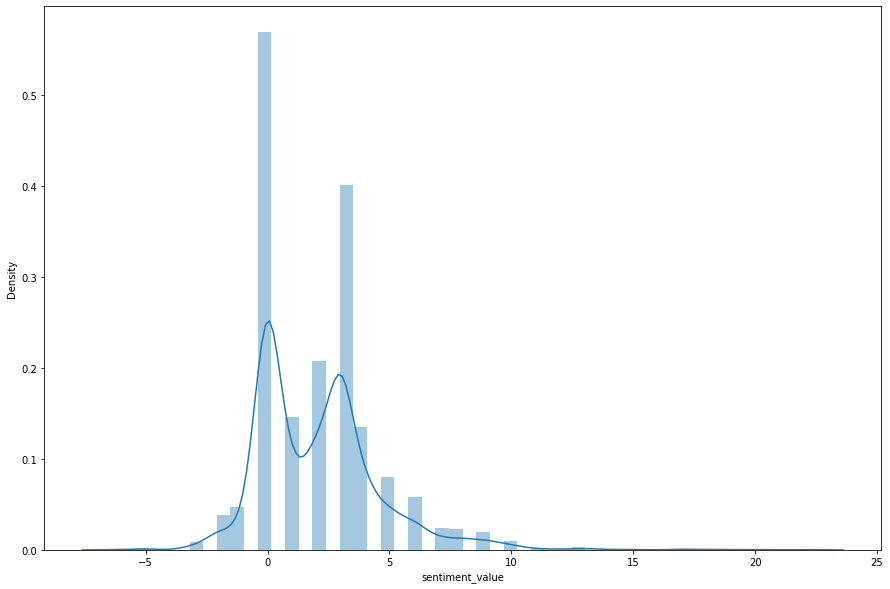

In [51]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

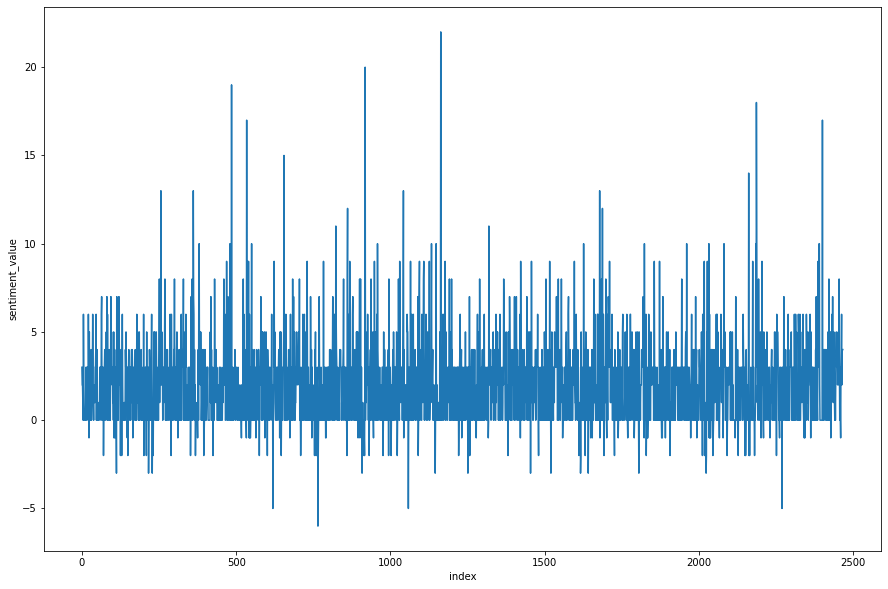

In [52]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)